In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [2]:
from matplotlib.pylab import mpl
import matplotlib
from matplotlib.font_manager import FontManager
import subprocess
    

def get_support_chinese_font():
    fm = FontManager()
    mat_fonts = set(f.name for f in fm.ttflist)

    output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
    # print '*' * 10, '系统可用的中文字体', '*' * 10
    # print output
    zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
    available = mat_fonts & zh_fonts

    print '*' * 10, '可用的中文字体', '*' * 10
    for f in available:
        print f
    return available

mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
def _date_parser(dstr):
    return pd.Timestamp(dstr).date()
raw = pd.read_csv('dida_20151220.csv', header=3, index_col='Due Date', parse_dates=True, date_parser=_date_parser)

In [4]:
pd.Timestamp("2015-12-17T16:00:00+0000").date()

datetime.date(2015, 12, 17)

In [5]:
data = raw[raw['Status'] != 0].loc[:, ['List Name', 'Title']]
data.head()

,List Name,Title
Due Date,,
2015-12-20,本职工作,处理合同相关事务 [1h]
2015-12-20,本职工作,[沟通协调] 项目沟通协调 [2h]
2015-12-17,本职工作,[会议] i-jia 项目软件周例会 [2h]
2015-12-17,本职工作,年会节目彩排 [1.5h]
2015-12-16,本职工作,整理智能家居规范制定申请表和智能家居教材编写申请表 [2h]


In [6]:
import re

def parse_tag(value):
    m = re.match(r'^(\[(.*?)\])?.*$', value)
    if m and m.group(2):
        return m.group(2)
    else:
        return '其他'

def parse_duration(value):
    m = re.match(r'^.+?\[(.*?)([hm]?)\]$', value)
    if m:
        dur = 0
        try:
            dur = float(m.group(1))
        except e:
            print('parse duration error: \n%s' % e)
        if m.group(2) != 'm':
            dur = dur * 60
        return int(dur)
    else:
        return 0
    
titles = data['Title']
data['Tag'] = titles.map(parse_tag)
data['Duration'] = titles.map(parse_duration)
data

,List Name,Title,Tag,Duration
Due Date,,,,
2015-12-20,本职工作,处理合同相关事务 [1h],其他,60
2015-12-20,本职工作,[沟通协调] 项目沟通协调 [2h],沟通协调,120
2015-12-17,本职工作,[会议] i-jia 项目软件周例会 [2h],会议,120
2015-12-17,本职工作,年会节目彩排 [1.5h],其他,90
2015-12-16,本职工作,整理智能家居规范制定申请表和智能家居教材编写申请表 [2h],其他,120
2015-12-15,本职工作,处理讯飞和萤石平台开发者账号问题 [4h],其他,240
2015-12-14,本职工作,语义控制实现方案评估 [4h],其他,240
2015-12-14,本职工作,帮Jon配置服务器 [2h],其他,120
2015-12-13,本职工作,[会议] i-jia 项目例会 [30m],会议,30


In [7]:
data[data['List Name'] == '自我提升'].groupby(level=0).sum()['Duration'].sum()

0

In [8]:
data[data['Tag'] == '写作']

,List Name,Title,Tag,Duration
Due Date,,,,
2015-12-18,自我成长,[写作] 基于协同过滤算法的推荐系统 [1.5h],写作,90
2015-12-12,自我成长,[写作] 《scikit-learn 机器学习入门》 目录编写 [2h],写作,120
2015-12-11,自我成长,[写作] 《主成份分析算法 PCA》 [1.5h],写作,90
2015-12-02,自我成长,[写作]《支持向量机 SVM 算法》[3h],写作,180
2015-12-06,自我成长,[写作] 《支持向量机核函数》[4h],写作,240
2015-12-07,自我成长,[写作] 《K 均值算法》[1h],写作,60
2015-12-09,自我成长,[写作] 培训文档 《使用 sublime + plantuml 画图》[4h],写作,240


In [9]:
routine_duration = 14 # hours
days_data = data.groupby(level=0).sum()
days_data['Thief'] = ((24 - routine_duration) * 60) - days_data['Duration']
days_data['Routine'] = routine_duration * 60
days_data

,Duration,Thief,Routine
Due Date,,,
2015-10-13,120,480,840
2015-10-22,300,300,840
2015-12-02,180,420,840
2015-12-03,40,560,840
2015-12-04,180,420,840
2015-12-06,420,180,840
2015-12-07,60,540,840
2015-12-08,300,300,840
2015-12-09,420,180,840


In [10]:
np.sum(days_data, axis=1)

Due Date
2015-10-13    1440
2015-10-22    1440
2015-12-02    1440
2015-12-03    1440
2015-12-04    1440
2015-12-06    1440
2015-12-07    1440
2015-12-08    1440
2015-12-09    1440
2015-12-10    1440
2015-12-11    1440
2015-12-12    1440
2015-12-13    1440
2015-12-14    1440
2015-12-15    1440
2015-12-16    1440
2015-12-17    1440
2015-12-18    1440
2015-12-19    1440
2015-12-20    1440
dtype: int64

In [11]:
np.sum(days_data)

Duration     7345
Thief        4655
Routine     16800
dtype: int64

In [12]:
# Check time
np.all(np.sum(days_data, axis=1).values == (24 * 60))

True

In [13]:
# All time has been stolen
np.sum(days_data.loc['2015-12-10':'2015-12-20']['Thief'])

1275

In [14]:
list_name = data.groupby('List Name').sum()
time_stief = pd.DataFrame({'Duration': [2000]}, index=['时间小偷'])
list_name = pd.concat([list_name, time_stief])

In [15]:
explode = np.zeros(len(list_name['Duration'].values))
explode[-1] = 0.05
explode

array([ 0.  ,  0.  ,  0.  ,  0.05])

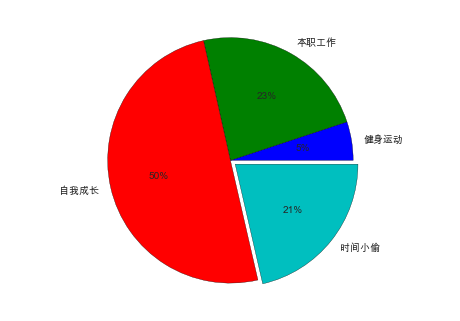

In [16]:
labels = lambda values : [v.decode('utf-8') for v in values]
plt.axis('equal')
plt.pie(list_name['Duration'].values, explode=explode, labels=labels(list_name.index.values), autopct='%1.0f%%');

In [17]:
tag_list = data.groupby(['List Name', 'Tag']).sum()
tag_list

Duration
List Name Tag           
健身运动      跑步         355
          踏青         120
本职工作      会议         420
          其他        1650
          沟通协调       120
自我成长      写作        1020
          探索发现       750
          机器学习       750
          视频录制      1530
          阅读         630

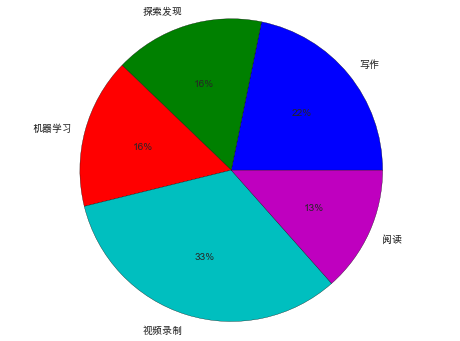

In [18]:
plt.pie(tag_list.loc['自我成长']['Duration'].values, labels=labels(tag_list.loc['自我成长'].index.values), autopct='%1.0f%%')
plt.axis('equal');

In [19]:
(pd.Timestamp(data.index.values.max()) - pd.Timestamp(data.index.values.min())).days

68

<Container object of 69 artists>

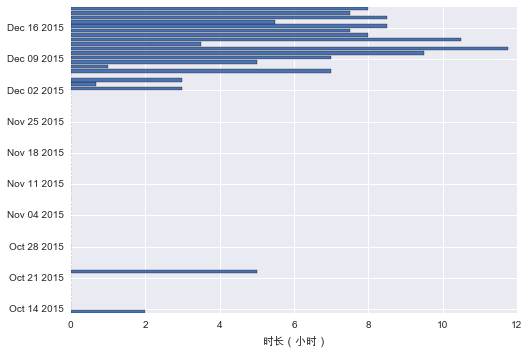

In [20]:
start_day = str(pd.Timestamp(data.index.values.min()).date())
end_day = str(pd.Timestamp(data.index.values.max()).date())
idx = pd.date_range(start=start_day, end=end_day)
days = days_data.reindex(idx)
days['Duration'].fillna(value=1, inplace=True)
days['Thief'].fillna(value=600, inplace=True)
days['Routine'].fillna(value=840, inplace=True)
plt.xlabel(u'时长（小时）')
plt.barh(days.index.values, days['Duration'].values / 60)

<Container object of 69 artists>

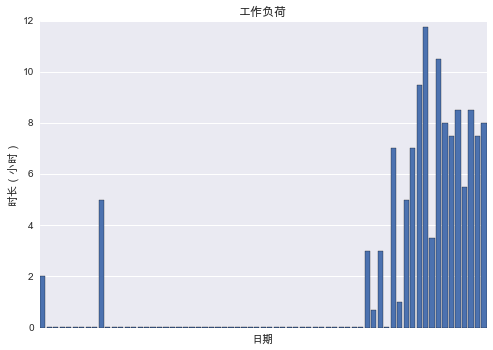

In [21]:
plt.title(u'工作负荷')
plt.xticks([])
plt.xlabel(u'日期')
plt.ylabel(u'时长（小时）')
plt.bar(days.index.values, days['Duration'].values / 60)

In [22]:
days

,Duration,Thief,Routine
2015-10-13,120,480,840
2015-10-14,1,600,840
2015-10-15,1,600,840
2015-10-16,1,600,840
2015-10-17,1,600,840
2015-10-18,1,600,840
2015-10-19,1,600,840
2015-10-20,1,600,840
2015-10-21,1,600,840
2015-10-22,300,300,840


In [23]:
days_data

,Duration,Thief,Routine
Due Date,,,
2015-10-13,120,480,840
2015-10-22,300,300,840
2015-12-02,180,420,840
2015-12-03,40,560,840
2015-12-04,180,420,840
2015-12-06,420,180,840
2015-12-07,60,540,840
2015-12-08,300,300,840
2015-12-09,420,180,840


In [24]:
fields = data['List Name'].unique()
_fieldname = lambda fds: [s.decode('utf-8') for s in fds]
_fieldname(fields)

[u'\u672c\u804c\u5de5\u4f5c',
 u'\u5065\u8eab\u8fd0\u52a8',
 u'\u81ea\u6211\u6210\u957f']